               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-nul

/tmp/ipykernel_12115/2805602974.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


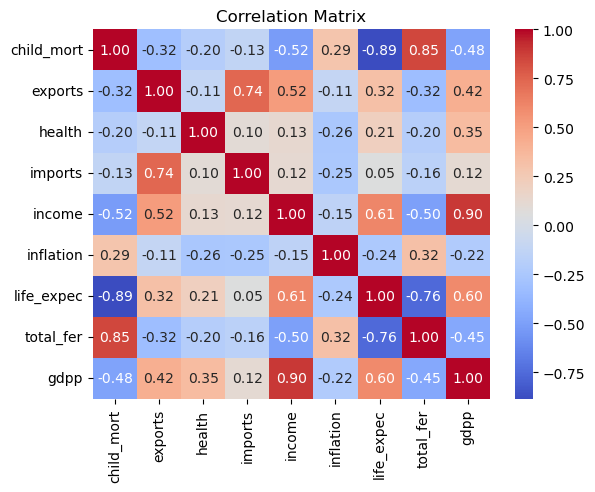

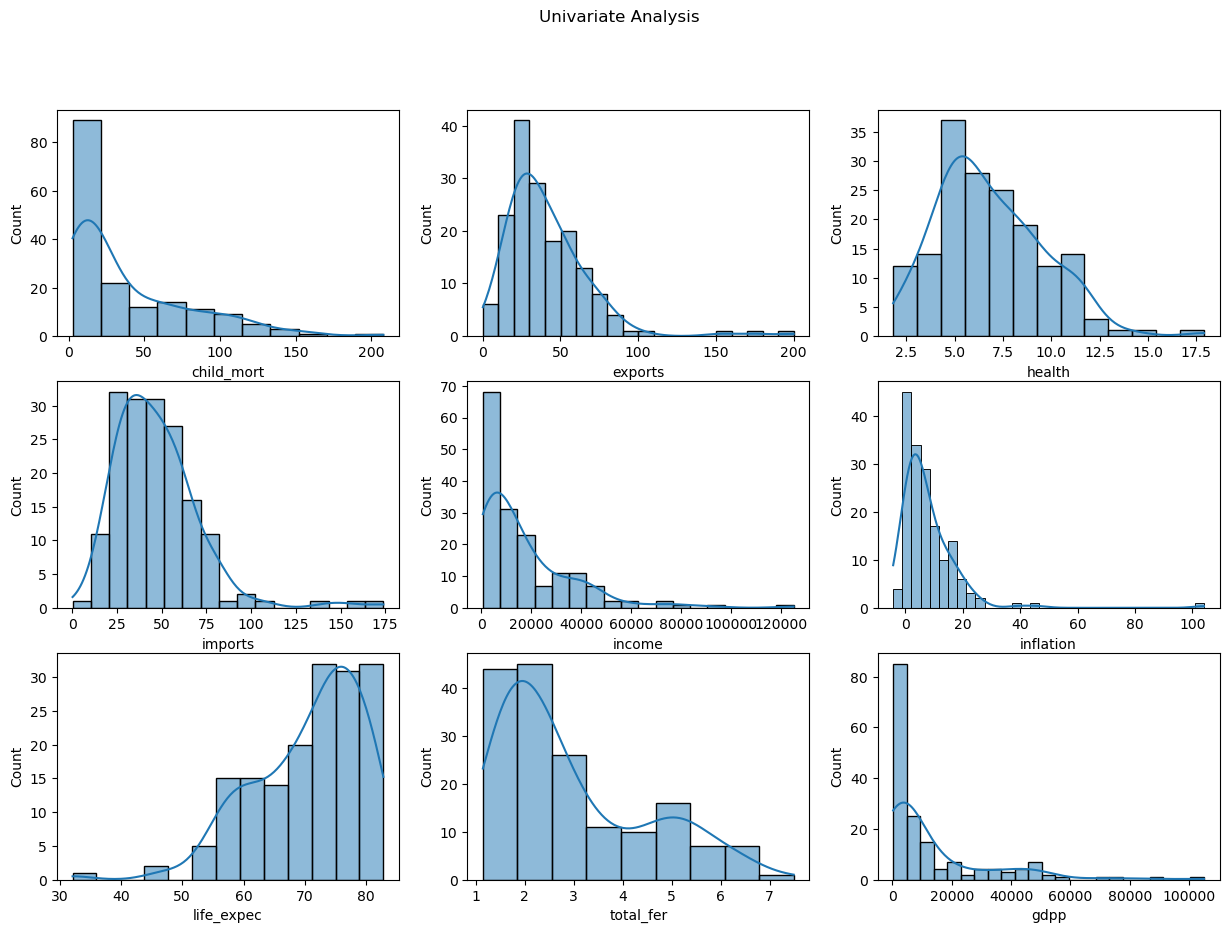

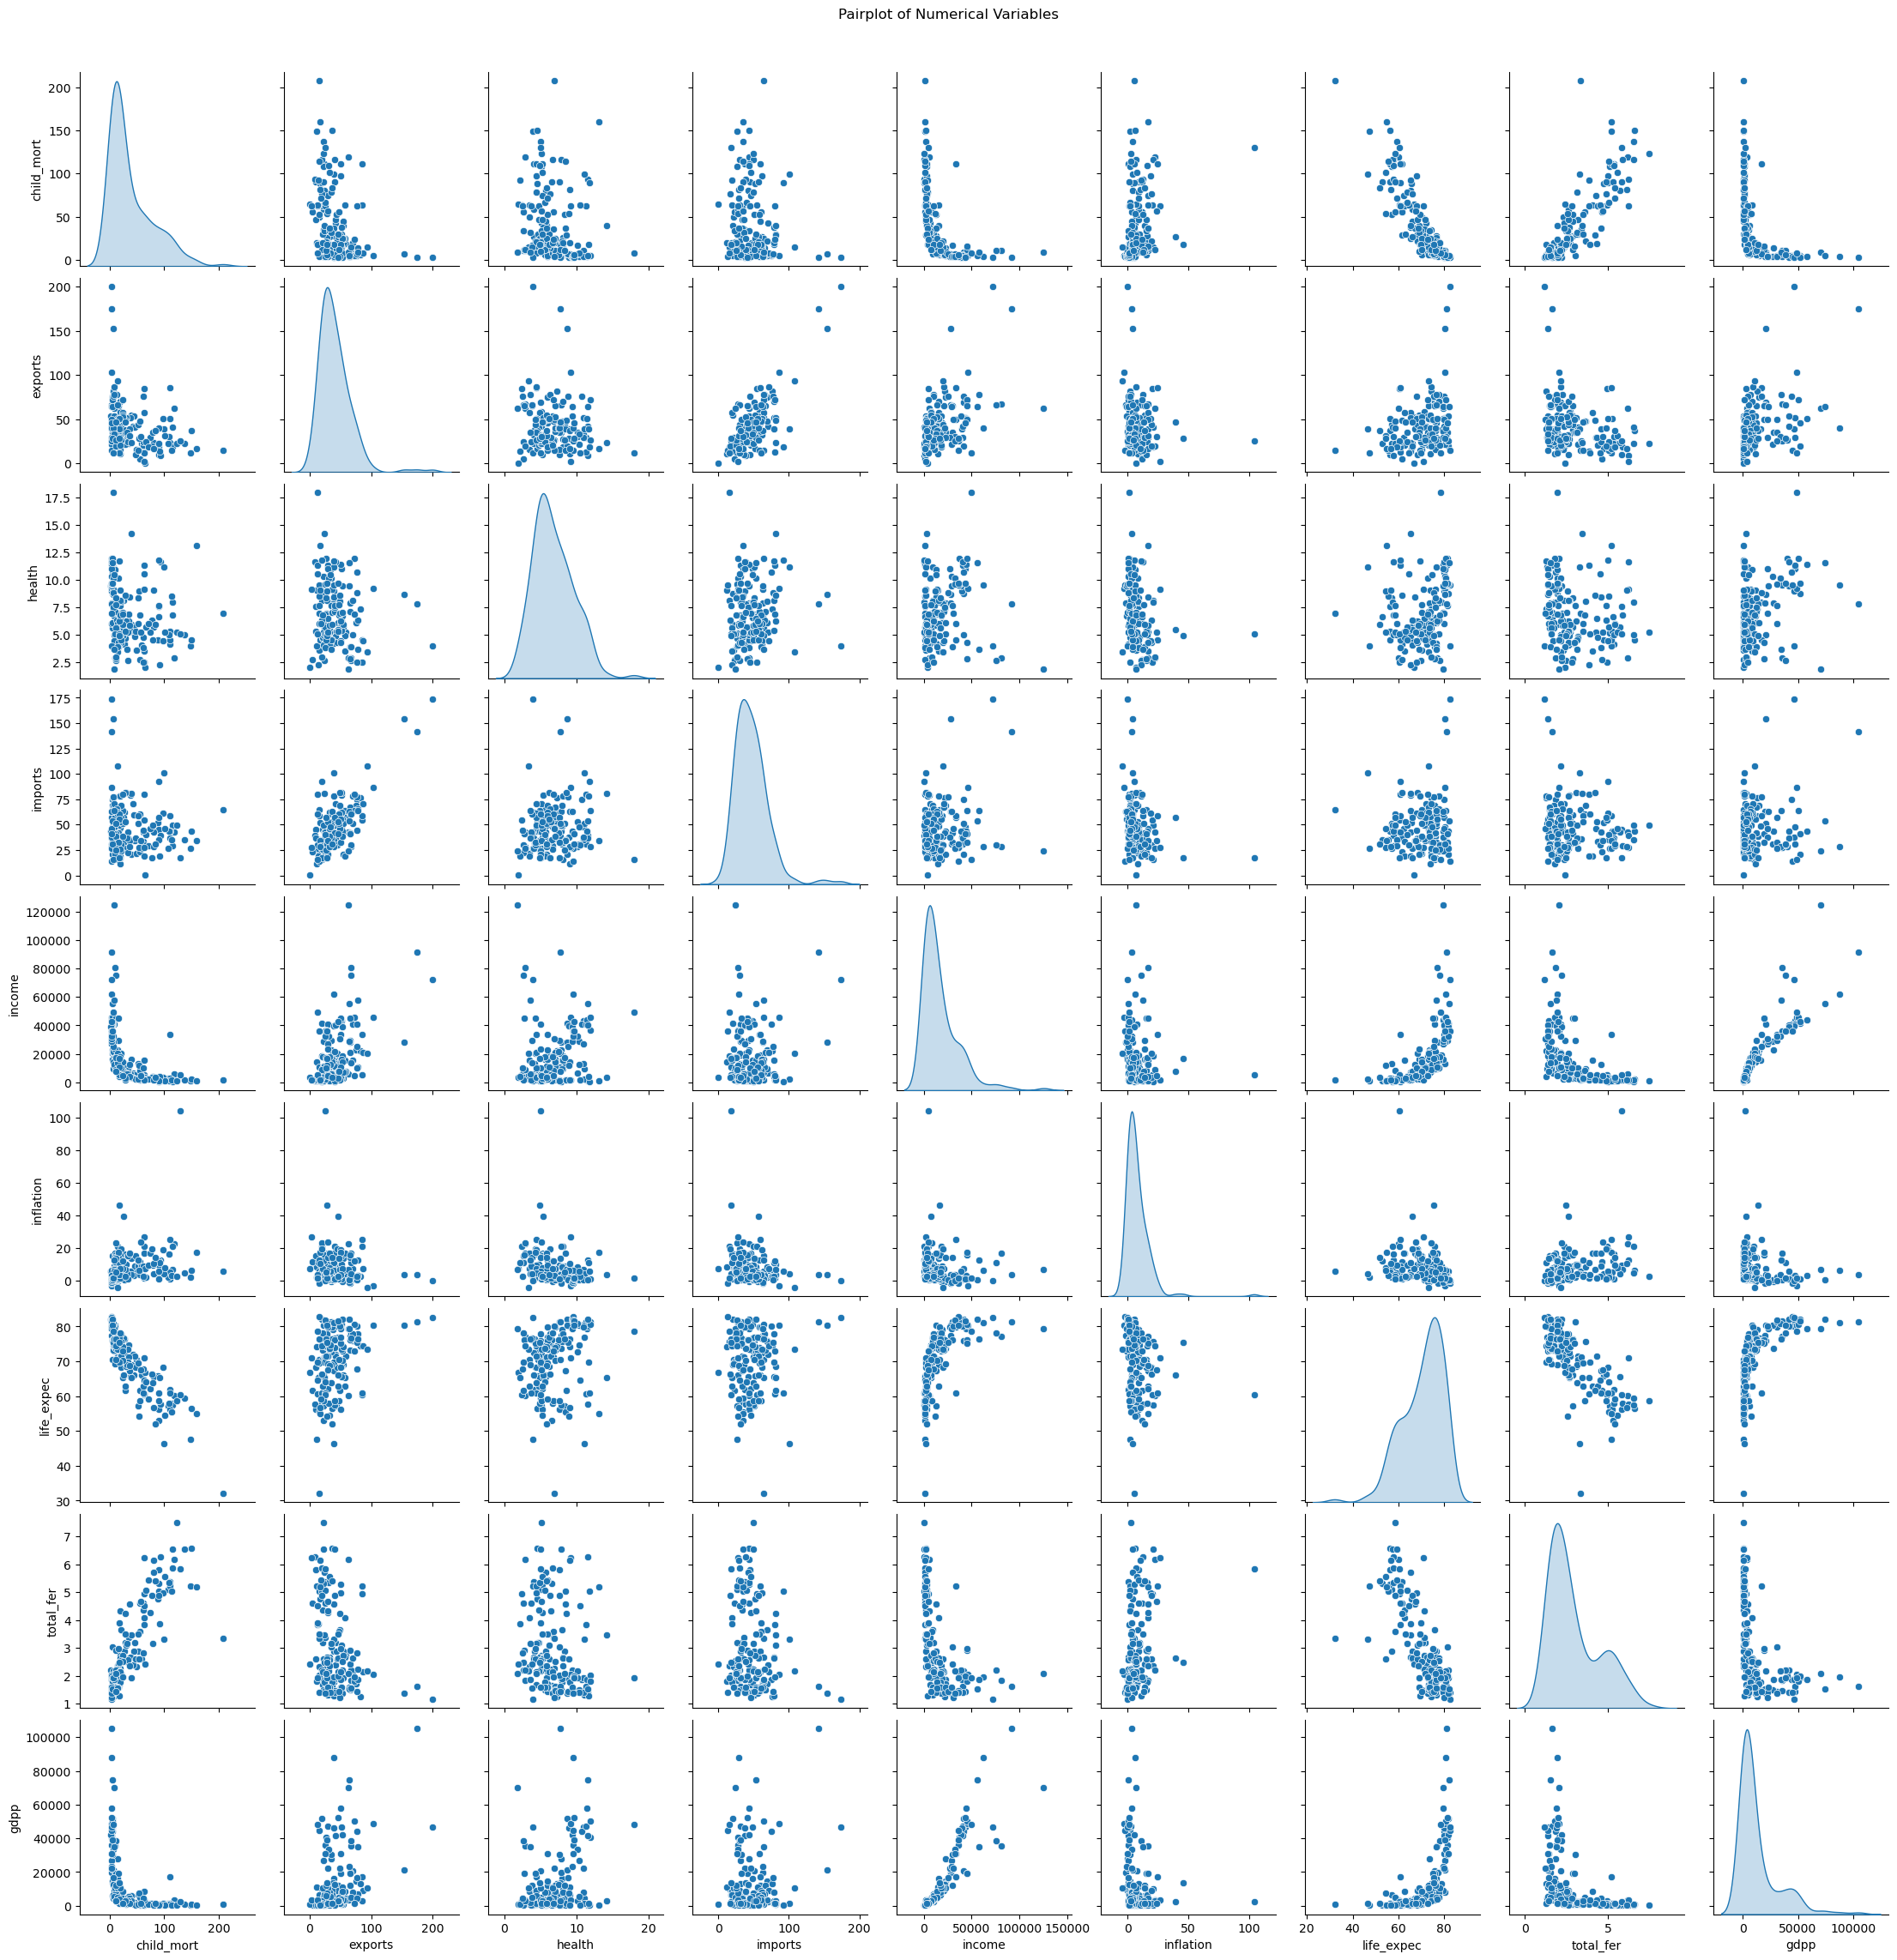

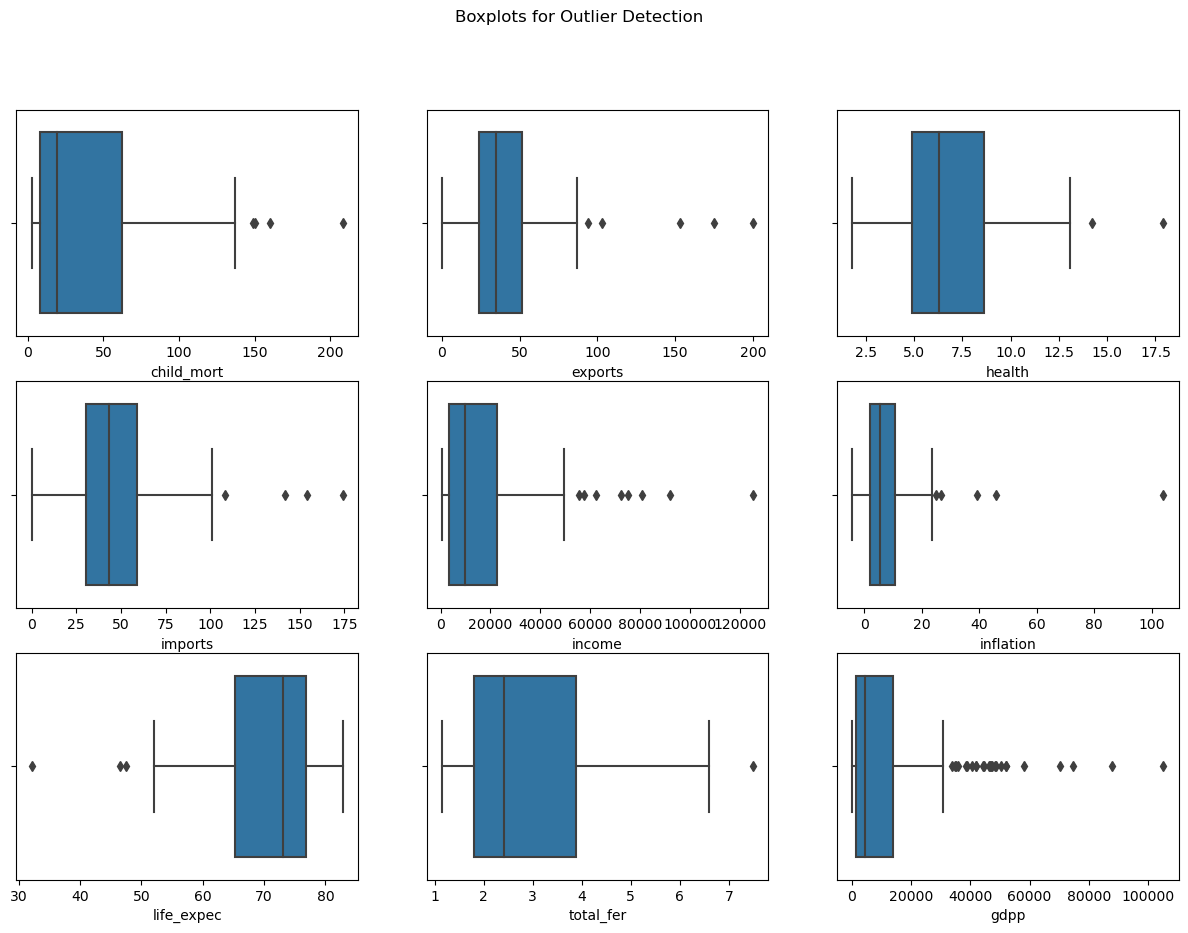

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('Country-data.csv')

# Display the first few rows of the dataset
print(data.head())

# Check basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Univariate analysis
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Univariate Analysis')

# Histograms
for i, column in enumerate(data.columns[1:]):
    sns.histplot(data[column], ax=axes[i // 3, i % 3], kde=True)

plt.show()

# Bivariate analysis
pairplot = sns.pairplot(data=data, diag_kind='kde')
pairplot.fig.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Outlier detection
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Boxplots for Outlier Detection')

# Boxplots
for i, column in enumerate(data.columns[1:]):
    sns.boxplot(x=data[column], ax=axes[i // 3, i % 3])

plt.show()

features = data.drop('country', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the standardized features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the standardized data
print(scaled_data.head())

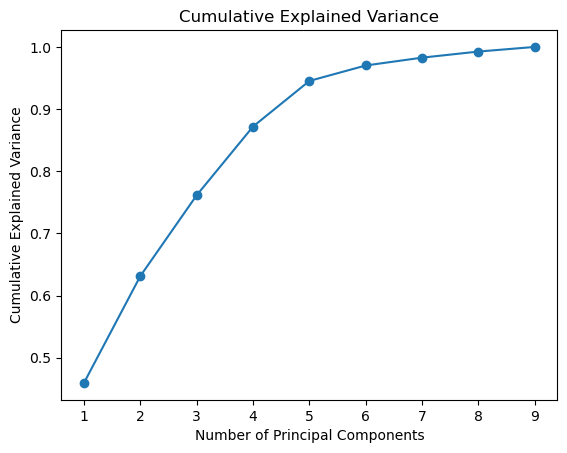

Number of components:  6
Number of components to retain 95.0% of variance: 6


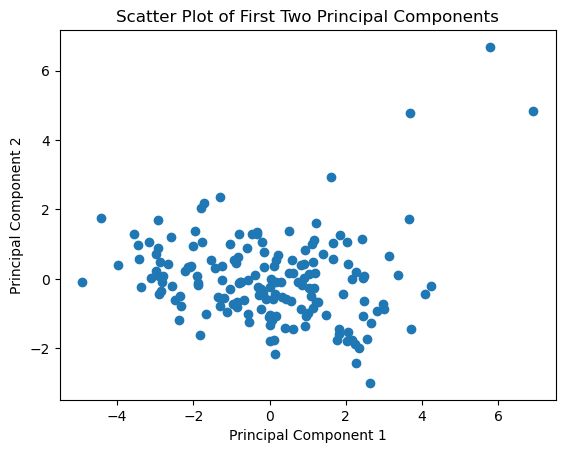

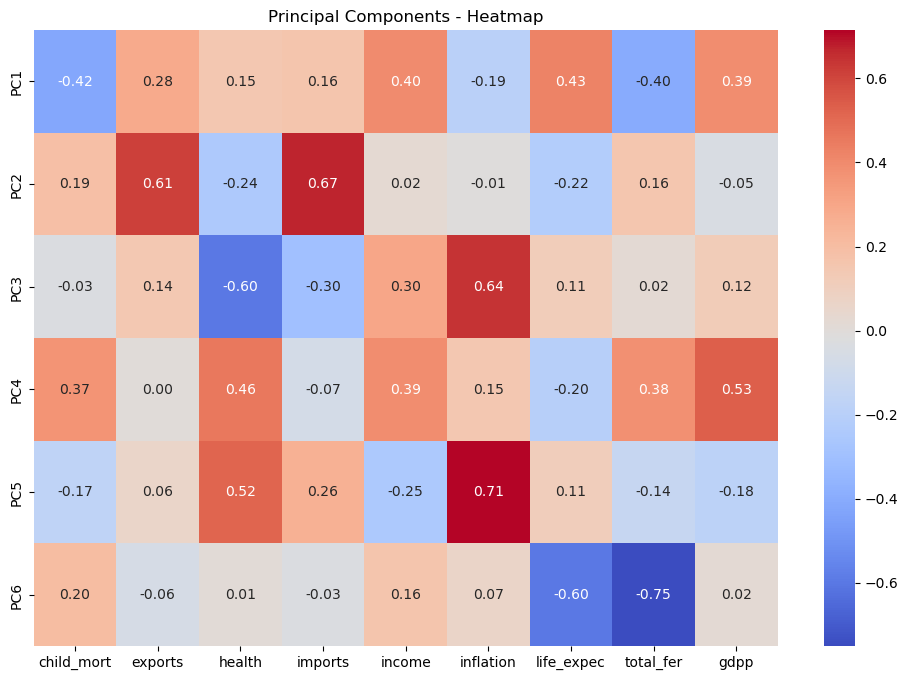

In [37]:
from sklearn.decomposition import PCA

# Assuming scaled_data is the standardized data from the previous step

# Initialize PCA
pca = PCA()

# Fit PCA to the standardized data
pca.fit(scaled_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Determine the optimal number of components based on a desired explained variance threshold (e.g., 95%)
desired_explained_variance = 0.95
num_components = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1
print("Number of components: ",num_components)
print(f'Number of components to retain {desired_explained_variance * 100}% of variance: {num_components}')

# Perform PCA with the optimal number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Scatter plot of the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Heatmap of the principal components
plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=scaled_data.columns, yticklabels=[f'PC{i}' for i in range(1, num_components + 1)])
plt.title('Principal Components - Heatmap')
plt.show()


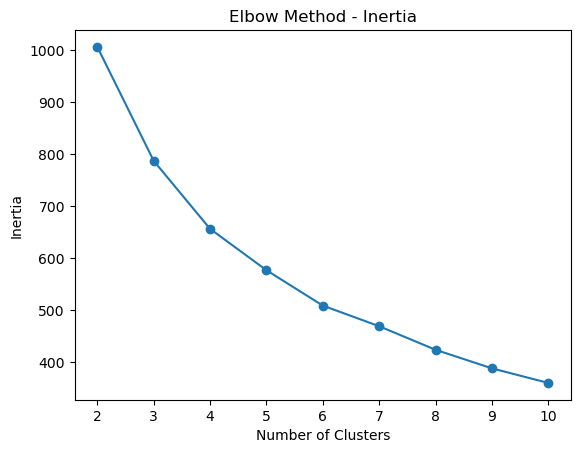

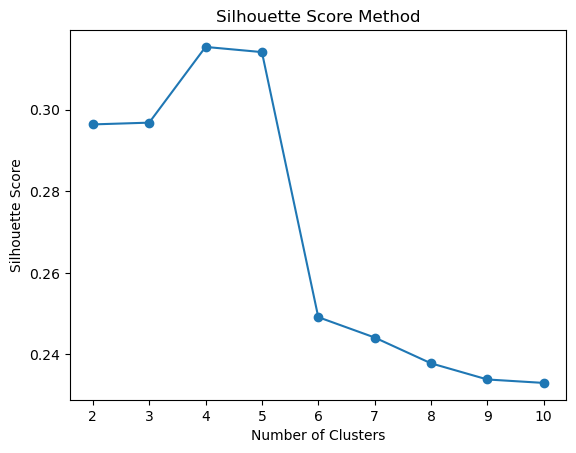

Optimal number of clusters (Elbow Method): 4
Optimal number of clusters (Silhouette Score): 4


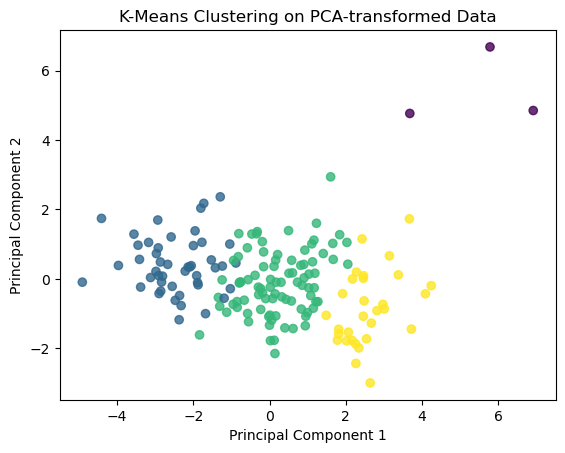

              PC1       PC2       PC3       PC4       PC5       PC6
Cluster                                                            
0        5.460225  5.432473  0.211648  0.906058  0.455229 -0.158735
1       -2.434620  0.411276 -0.096167  0.691710 -0.141458 -0.044116
2        0.235279 -0.110651  0.018769 -0.743741  0.150435  0.037315
3        2.585905 -0.866690  0.075067  0.982564 -0.260166 -0.023223


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Assuming pca_df is the DataFrame with PCA-transformed data from the previous step

# Initialize KMeans with a range of clusters
num_clusters_range = range(2, 11)  # You can adjust the range based on your dataset
inertia_values = []  # to store the inertia values for the elbow method
silhouette_scores = []  # to store silhouette scores

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pca_df)
    
    # Elbow Method: Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plot the Elbow Method
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Determine the optimal number of clusters based on the elbow method
optimal_num_clusters_elbow = 4
print(f'Optimal number of clusters (Elbow Method): {optimal_num_clusters_elbow}')

# Determine the optimal number of clusters based on silhouette score
optimal_num_clusters_silhouette = num_clusters_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (Silhouette Score): {optimal_num_clusters_silhouette}')

# Apply K-Means with the optimal number of clusters
optimal_kmeans = KMeans(n_clusters=optimal_num_clusters_elbow, random_state=42)
optimal_kmeans.fit(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = optimal_kmeans.labels_

# Scatter plot of the first two principal components with cluster colors
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.8)
plt.title('K-Means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analyze the clusters
cluster_analysis = pca_df.groupby('Cluster').mean()
print(cluster_analysis)


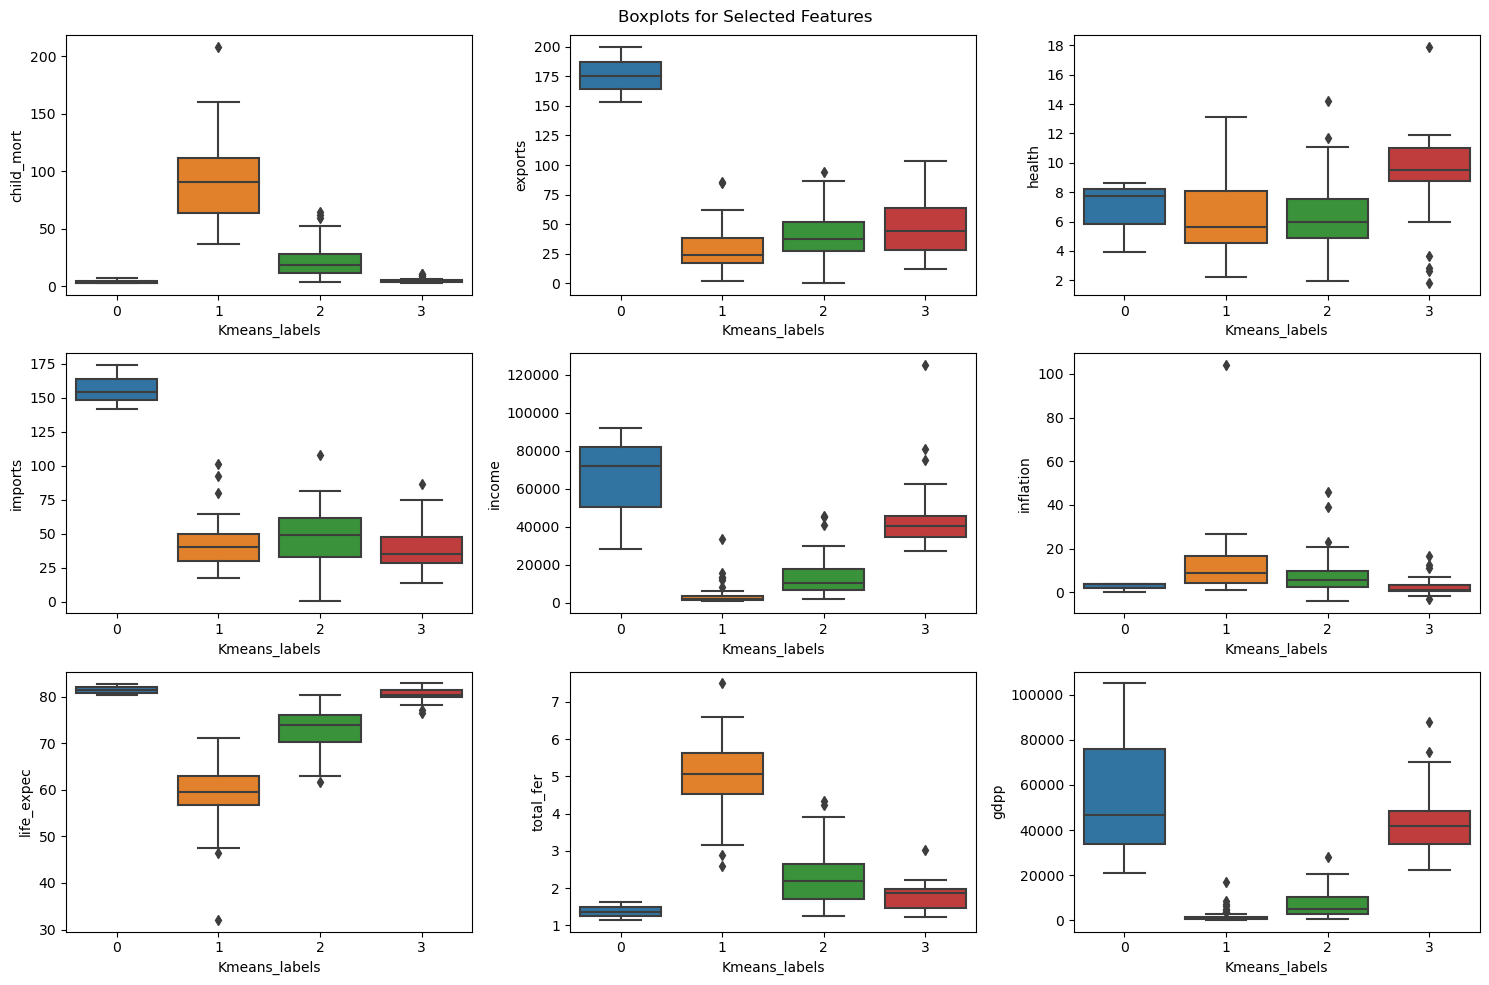

In [39]:
new_data = data.copy()
new_data['Kmeans_labels'] = optimal_kmeans.labels_
new_data.head()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Boxplots for Selected Features')

# Boxplots
for i, column in enumerate(new_data.columns[1:-1]):
    sns.boxplot(x='Kmeans_labels', y=column, data=new_data, ax=axes[i // 3, i % 3])

plt.tight_layout()
plt.show()
